In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2024-01-23 14:09:34.235715: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# IMPORT IMAGES
import os

directory = r'/Users/janbarganowski/Desktop/Neural Network Final Project/training_data'
images = os.listdir(directory)

dog.7322.jpg


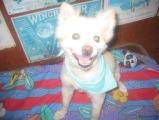

In [11]:
path = images[2]
print(path)
load_img(f'{directory}/{path}')

In [10]:
# yes that is a dog

In [12]:
# set a full list of images
full_images = [os.path.join(directory, img) for img in images]

In [13]:
print(len(full_images))
print(full_images[:5])

25000
['/Users/janbarganowski/Desktop/Neural Network Final Project/training_data/dog.8011.jpg', '/Users/janbarganowski/Desktop/Neural Network Final Project/training_data/cat.5077.jpg', '/Users/janbarganowski/Desktop/Neural Network Final Project/training_data/dog.7322.jpg', '/Users/janbarganowski/Desktop/Neural Network Final Project/training_data/cat.2718.jpg', '/Users/janbarganowski/Desktop/Neural Network Final Project/training_data/cat.10151.jpg']


In [19]:
# parse data in the filename
def parse_image(index, full_images):
    filepath = full_images[index]
    
    filename = os.path.basename(filepath)
    
    nameparts = filename.split('.')
    animal = nameparts[0]
    number = nameparts[1]

    print(f"Animal: {animal}, Number: {number}")

    image = load_img(filepath)

    return image

Animal: dog, Number: 1368


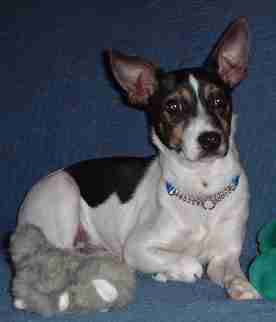

In [20]:
parse_image(2022, full_images=full_images)

Animal: cat, Number: 2940


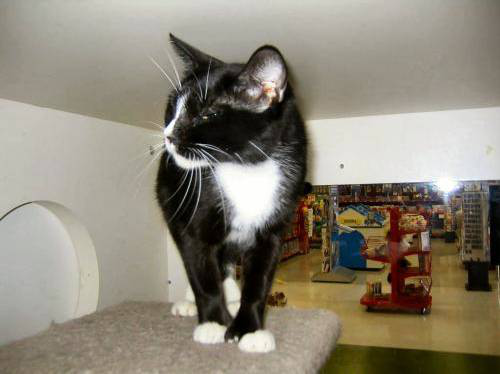

In [21]:
parse_image(13948, full_images=full_images)

In [22]:
# loading more imports from the imports_for_ML file we got a few weeks ago in class
from imports_for_ML import load_images

In [23]:
# Loading all images
X, y = load_images(directory, n_images=25000, resize=(50, 50))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
*******************************

In [24]:
# due to high volume of the data, I decided to use 4% of the images for testing - which equals to 1000 images
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, random_state=7)

In [26]:
# keras imports for model assembly
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [27]:
# In this project, I will build 2 models with different architectures, test them, and select the one that performs best.


In [37]:
#MODEL 1
# This model is based on the work we did in class previously, but with some additional features - like the dropout layer that is supposed to prevent overfitting
model_1_new = Sequential()

model_1_new.add(Conv2D(32, (3, 3), activation='relu'))
model_1_new.add(Conv2D(32, (3, 3), activation='relu'))


model_1_new.add(MaxPooling2D(pool_size=(2, 2)))


model_1_new.add(Conv2D(64, (3, 3), activation='relu'))
model_1_new.add(Conv2D(64, (3, 3), activation='relu'))


model_1_new.add(MaxPooling2D(pool_size=(2, 2)))

# dropout layer
model_1_new.add(Dropout(0.5))


model_1_new.add(Flatten())


model_1_new.add(Dense(128, activation='relu'))


model_1_new.add(Dense(1, activation='sigmoid'))

model_1_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
# train model 1, including validation data
history_model1 = model_1_new.fit(
    x=X_train, 
    y=y_train, 
    epochs=15, 
    validation_split=0.2  # using 20% of data for validation
)

Epoch 1/15
600/600 [==============================] - 60s 99ms/step - loss: 0.9062 - accuracy: 0.5891 - val_loss: 0.6623 - val_accuracy: 0.6212
Epoch 2/15
600/600 [==============================] - 61s 102ms/step - loss: 0.6225 - accuracy: 0.6536 - val_loss: 0.5752 - val_accuracy: 0.6954
Epoch 3/15
600/600 [==============================] - 62s 104ms/step - loss: 0.5666 - accuracy: 0.7094 - val_loss: 0.5461 - val_accuracy: 0.7169
Epoch 4/15
600/600 [==============================] - 61s 101ms/step - loss: 0.5151 - accuracy: 0.7502 - val_loss: 0.4989 - val_accuracy: 0.7675
Epoch 5/15
600/600 [==============================] - 60s 101ms/step - loss: 0.4807 - accuracy: 0.7683 - val_loss: 0.4744 - val_accuracy: 0.7690
Epoch 6/15
600/600 [==============================] - 60s 99ms/step - loss: 0.4427 - accuracy: 0.7929 - val_loss: 0.4409 - val_accuracy: 0.7969
Epoch 7/15
600/600 [==============================] - 60s 100ms/step - loss: 0.4134 - accuracy: 0.8135 - val_loss: 0.4237 - val_accu

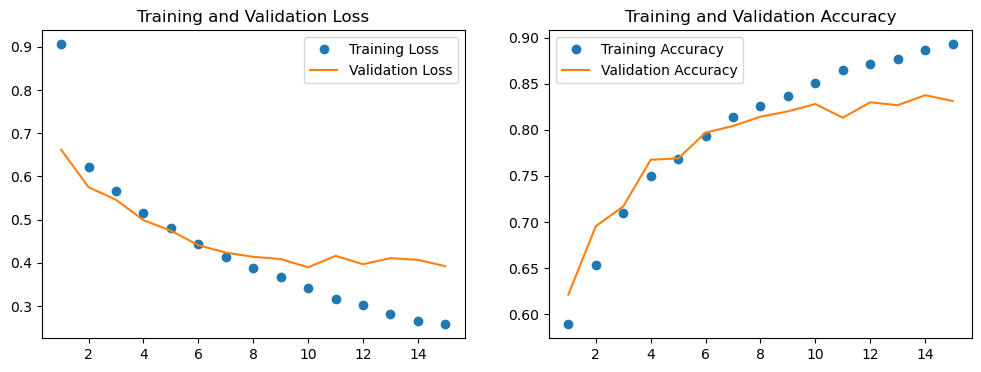

In [41]:
#  metrics
train_loss = history_model1.history['loss']
val_loss = history_model1.history['val_loss']
train_acc = history_model1.history['accuracy']
val_acc = history_model1.history['val_accuracy']

epochs_range = range(1, len(train_loss) + 1)

# Training / Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, 'o', label='Training Loss')  # Dots for Training Loss
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Training / Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, 'o', label='Training Accuracy')  # Dots for Training Accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [43]:
test_loss, test_accuracy = model_1_new.evaluate(X_test, y_test)


print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

32/32 [==============================] - 1s 17ms/step - loss: 0.3961 - accuracy: 0.8200
Test Loss: 0.3960903286933899
Test Accuracy: 0.8199999928474426


In [44]:
# preds
predictions = model_1_new.predict(X_test)
predicted_classes = (predictions > 0.5).astype("int32")

32/32 [==============================] - 1s 18ms/step


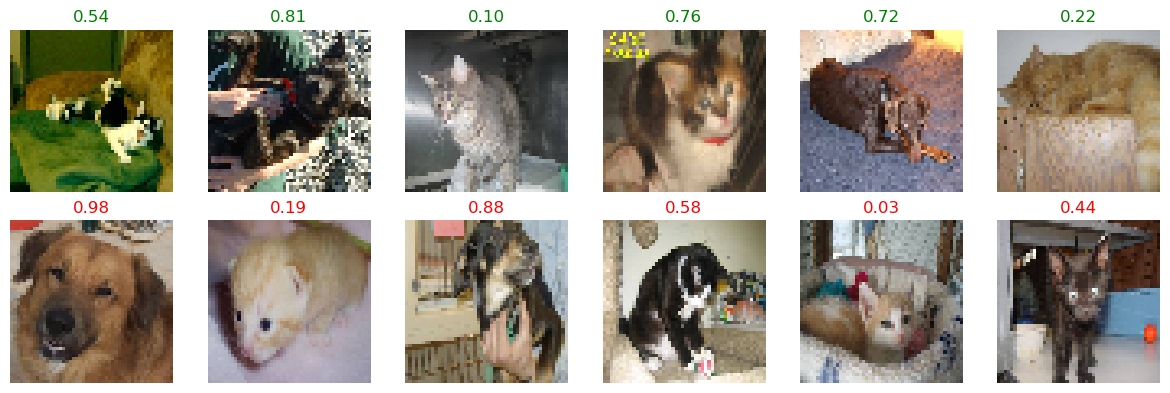

In [58]:
correct = np.where(predicted_classes == y_test)[0]
incorrect = np.where(predicted_classes != y_test)[0]

# choose 6 randoms predictions for both correct and incorrect predictions
correctly_labeled = np.random.choice(correct, 6, replace=False)
incorrectly_labeled = np.random.choice(incorrect, 6, replace=False)

# show images
plt.figure(figsize=(12, 4))

for i, index in enumerate(correctly_labeled, 1):
    plt.subplot(2, 6, i)
    plt.imshow(X_test[index].astype(np.uint8))
    plt.title(f'{predictions[index][0]:.2f}', color='green')
    plt.axis('off')

for i, index in enumerate(incorrectly_labeled, 7):
    plt.subplot(2, 6, i)
    plt.imshow(X_test[index].astype(np.uint8))
    plt.title(f'{predictions[index][0]:.2f}', color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()


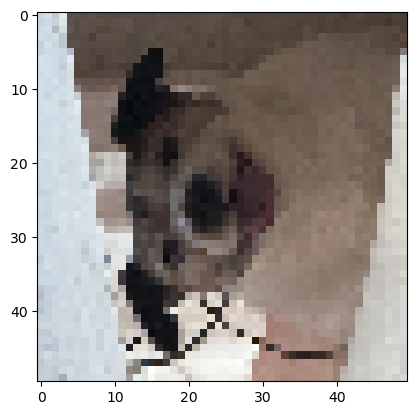

In [53]:
img_new = load_img(r'/Users/janbarganowski/Desktop/Kozminski/Python/class_10/IMG_2801.JPG', target_size=(50, 50))
plt.imshow(img_new)

In [55]:
img_array = img_to_array(img_new)
model_1_new.predict(img_array.reshape(1, 50, 50, 3))

1/1 [==============================] - 0s 72ms/step


array([[0.83135706]], dtype=float32)

In [59]:
img_newer = load_img(r'/Users/janbarganowski/Desktop/Kozminski/Python/class_10/jandog.JPG', target_size=(50, 50))

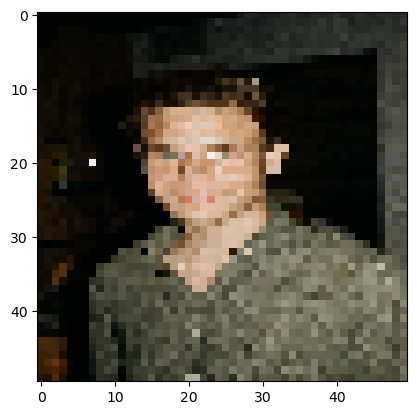

In [60]:
plt.imshow(img_newer)

In [61]:
img_arrayer = img_to_array(img_newer)

In [63]:
model_1_new.predict(img_arrayer.reshape(1, 50, 50, 3))

1/1 [==============================] - 0s 28ms/step


array([[0.84738857]], dtype=float32)

In [66]:
import keras
keras.models.save_model(model=model_1_new, filepath=r'/Users/janbarganowski/Desktop/cats_dogs_model_1', 
                           save_format='h5')

In [69]:
# MODEL 2
# This model is created from scratch, using a different optimizer, and activations

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(Conv2D(64, (3, 3), activation='relu'))

model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), activation='tanh'))

model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())

model_2.add(Dense(256, activation='relu'))

model_2.add(Dropout(0.5))

model_2.add(Dense(128, activation='elu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
# train model 2, including validation data
history_model2 = model_2.fit(
    x=X_train, 
    y=y_train, 
    epochs=10, 
    validation_split=0.2  # using 20% of data for validation
)

Epoch 1/10


600/600 [==============================] - 66s 109ms/step - loss: 0.8572 - accuracy: 0.4924 - val_loss: 0.8102 - val_accuracy: 0.5021
Epoch 2/10
600/600 [==============================] - 66s 111ms/step - loss: 0.6938 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.5021
Epoch 3/10
600/600 [==============================] - 66s 110ms/step - loss: 0.6934 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.4979
Epoch 4/10
600/600 [==============================] - 66s 111ms/step - loss: 0.6934 - accuracy: 0.4915 - val_loss: 0.6931 - val_accuracy: 0.5021
Epoch 5/10
600/600 [==============================] - 65s 109ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6943 - val_accuracy: 0.5021
Epoch 6/10
600/600 [==============================] - 66s 110ms/step - loss: 0.6934 - accuracy: 0.4963 - val_loss: 0.6931 - val_accuracy: 0.5021
Epoch 7/10
600/600 [==============================] - 66s 110ms/step - loss: 0.6933 - accuracy: 0.5012 - val_loss: 0.6933 - val_accuracy: 0.4

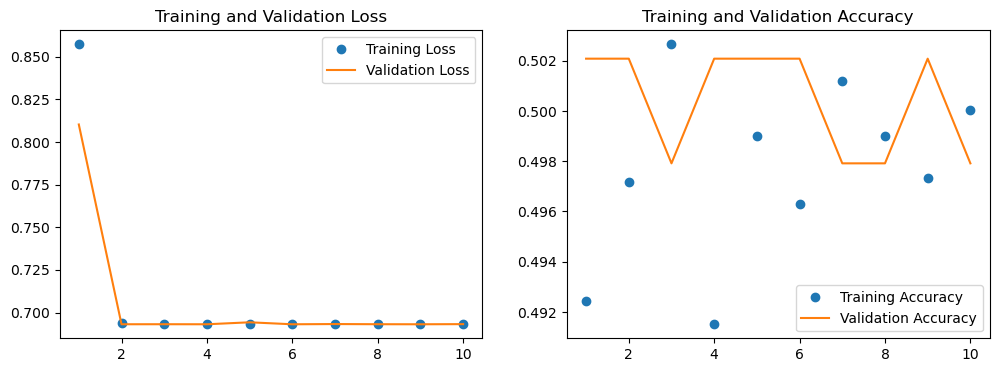

In [71]:
# this model seems to be quite bad

#  metrics
train_loss = history_model2.history['loss']
val_loss = history_model2.history['val_loss']
train_acc = history_model2.history['accuracy']
val_acc = history_model2.history['val_accuracy']

epochs_range = range(1, len(train_loss) + 1)

# Training / Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, 'o', label='Training Loss')  # Dots for Training Loss
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Training / Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, 'o', label='Training Accuracy')  # Dots for Training Accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [72]:
test_loss, test_accuracy = model_2.evaluate(X_test, y_test)


print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

32/32 [==============================] - 1s 25ms/step - loss: 0.6931 - accuracy: 0.5050
Test Loss: 0.693097710609436
Test Accuracy: 0.5049999952316284


In [73]:
# preds
predictions = model_2.predict(X_test)
predicted_classes = (predictions > 0.5).astype("int32")

32/32 [==============================] - 1s 25ms/step


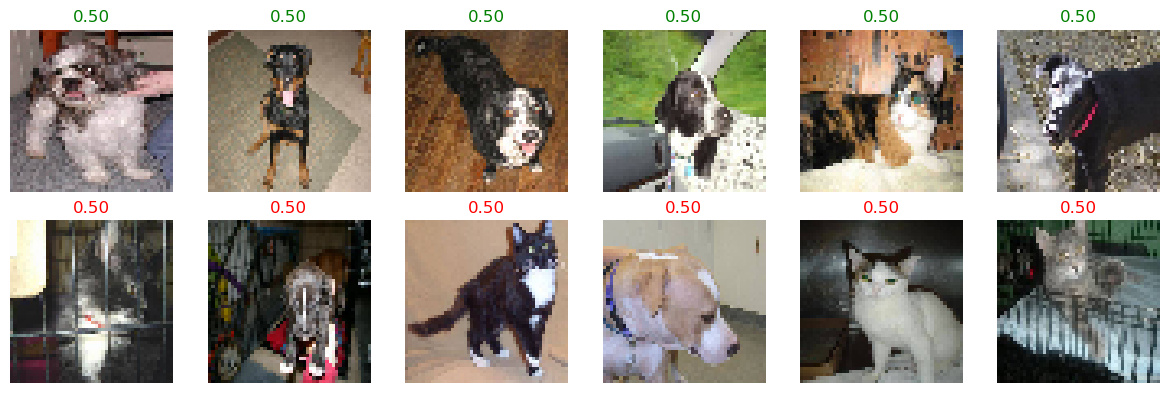

In [74]:
correct = np.where(predicted_classes == y_test)[0]
incorrect = np.where(predicted_classes != y_test)[0]

# choose 6 randoms predictions for both correct and incorrect predictions
correctly_labeled = np.random.choice(correct, 6, replace=False)
incorrectly_labeled = np.random.choice(incorrect, 6, replace=False)

# show images
plt.figure(figsize=(12, 4))

for i, index in enumerate(correctly_labeled, 1):
    plt.subplot(2, 6, i)
    plt.imshow(X_test[index].astype(np.uint8))
    plt.title(f'{predictions[index][0]:.2f}', color='green')
    plt.axis('off')

for i, index in enumerate(incorrectly_labeled, 7):
    plt.subplot(2, 6, i)
    plt.imshow(X_test[index].astype(np.uint8))
    plt.title(f'{predictions[index][0]:.2f}', color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [75]:
# the model is clueless 

In [77]:
# Selecting model 1, as it obviously is better, but will provide the file for model 2 regardless.

In [78]:
import keras
keras.models.save_model(model=model_2, filepath=r'/Users/janbarganowski/Desktop/cats_dogs_model_2', 
                           save_format='h5')